<a href="https://colab.research.google.com/github/Maiven/personal_Python_Practice/blob/master/python_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Solar System - Astroquery 라이브러리 사용하기

In [ ]:
pip install pygame

     |████████████████████████████████| 11.5MB 6.6MB/s 


In [ ]:
pip install display

  Created wheel for display: filename=display-1.0.0-cp36-none-any.whl size=1406 sha256=6967d326a5ed3b7fdb7c1b2da9e234ec74d95dd51646b43bd84e87c21237d980
  Stored in directory: /root/.cache/pip/wheels/da/65/2c/318b8e036689f425f6e26d51b83ca79bc44625fe96c91ba0bc
Successfully built display


In [ ]:
from urllib.parse import parse_qs
# urllib.parse는 python 3의 모듈이다. 2의 경우엔 urlparse 모듈을 사용하자.


my_values = parse_qs('red=5&blue=0&green=',keep_blank_values=True)

In [ ]:
red = int(my_values.get('red', [''])[0] or 0)

red = my_values.get('red',[''])
red = int(red[0]) if red[0] else 0
print(red)


5


In [ ]:
green = my_values.get('green', [''])
if green[0]:
    green = int(green[0])
    print(green)
else:
    green = 0
    print(green)

0


In [ ]:
pip install pandas

In [ ]:
pip install --upgrade astropy

Requirement already up-to-date: astropy in /usr/local/lib/python3.6/dist-packages (4.1)


In [ ]:
pip install --upgrade astroquery

     |████████████████████████████████| 6.5MB 10.7MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 2.6MB 55.0MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831874 sha256=06ecf44056bdd17dbb2e6727887c6266584388ee3316d75e43e3543ebab20c29
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/core.py", line 548, in _get_time_fmt
    return cls(val, val2, scale, precision, in_subfmt, out_subfmt)
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 139, in __init__
    self.out_subfmt = out_subfmt
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 181, in out_subfmt
    self._select_subfmts(subfmt)
  File "/usr/local/lib/python3.6/dist-packages/astropy/time/formats.py", line 392, in _select_subfmts
    raise ValueError(f'subformat {pattern!r} must match one of '
ValueError: subformat 'date' must match one of ['float', 'long', 'decimal', 'str', 'bytes'] for format jd

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-p

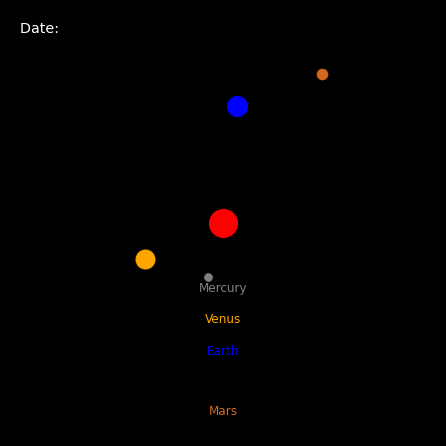

In [ ]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import astropy
from astropy.time import Time
from astroquery.jplhorizons import Horizons

sim_start_date = "2020-12-14"     # simulating a solar system starting from this date
sim_duration = 2 * 365                # (int) simulation duration in days
m_earth = 5.9722e24 / 1.98847e30  # Mass of Earth relative to mass of the sun
m_moon = 7.3477e22 / 1.98847e30

class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:

    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')

    def add_planet(self, planet):
        self.planets.append(planet)

    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)

        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='date').iso)
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])

ax = plt.axes([0., 0., 1., 1.], xlim=(-1.8, 1.8), ylim=(-1.8, 1.8))
ax.set_aspect('equal')
ax.axis('off')

ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = Time(sim_start_date).jd

colors = ['gray', 'orange', 'blue', 'chocolate']
sizes = [0.38, 0.95, 1., 0.53]
names = ['Mercury', 'Venus', 'Earth', 'Mars']
texty = [.47, .73, 1, 1.5]

for i, nasaid in enumerate([1, 2, 3, 4]):  # The 1st, 2nd, 3rd, 4th planet in solar system
    obj = Horizons(id=nasaid, location="@sun", epochs=ss.time, id_type='id').vectors()
    ss.add_planet(Object(nasaid, 20 * sizes[i], colors[i], 
                         [np.double(obj[xi]) for xi in ['x', 'y', 'z']], 
                         [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

In [ ]:
# 단어의 개수 
# 문제는 간단합니다. 입력으로 주어진 문자열에 단어가 몇 개 있는지 출력하면 됩니다. 

# 약간의 트릭이 있는데요. 입력으로 주어지는 문자열 앞 뒤로 공백이 주어지기 때문에 앞 뒤로 주어지는 공백을 처리해줘야 합니다. 

# python에서는 앞 뒤 공백을 제거해주는 strip() 내장 함수가 있습니다.


target = input().strip().split(' ')
if target[0] == '':
  print(0)
else:
  print(len(target))

    
0


In [ ]:
# 아스키코드 활용 - 비효율
target = input().split(' ')
for i in range(0, len(target)):
  if target[i] != ' ' and (target[i] >= chr(65) and target[i] <= chr(90)) or (target[i] >= chr(97) and target[i] <= chr(122)) :
    print(len(target))
    break


s s  
4


In [ ]:
print(chr(97))
print(chr(122))

a
z


In [ ]:
# 이 문제 역시 어렵지 않습니다. 문자가 주어지면 그 문자에 대한 아스키 코드를 출력하면 됩니다.

# 처음에 python도 C나 C++처럼 문자를 입력받아 %d로 출력하면 되는줄 알고 그렇게 코딩을 하니 type error가 발생하였습니다.
print(ord(input()))


In [ ]:
# 알파벳 찾기
# 문자가 주어지면 단어가 처음 등장하는 위치를 찾으면 됩니다. 
# 제가 python으로 문자열 처리를 연습하는 이유는 바로 python 내장함수 때문입니다. 
# 문자열을 처리를 유용하게 해주는 python 내장함수가 많습니다. 특히 이 문제에서 내장함수를 유용하게 사용하여서 문제를 풀 수 있었습니다. 

s = input()
for _ in range(26):
  print(s.find(chr(_+97)), end=" ")

In [ ]:
# 단어공부

input_word = input().upper()
cnt = 0
result_word = ''
flag_bool = True
for _ in range(26):
    temp_word = input_word.count(chr(_+65))
    if temp_word > cnt:
        flag_bool = True
        cnt = temp_word
        result_word = chr(_+65)
    elif temp_word == cnt:
        flag_bool = False
if flag_bool == False:
    print("?")
else:
    print(result_word)

# 코드를 간단히 설명하면, 우선 출력이 대문자로 되어야 하기 때문에 주어진 입력을 대문자로 변경해주었습니다.

# 이후 3번에서 사용했던 chr을 이용하여 단어들을 각각 count 하면서 max값을 찾고 같은 값이 있다면 flag를 이용하여 표시해주었습니다.

# count()라는 내장함수를 사용하여 문자열에서 해당 단어가 몇 번 등장하는지 알 수 있었습니다.

asdfjljfASVDDD
D


In [ ]:
# 방 번호 
# 정답률은 낮지만 어려운 문제는 아닙니다. 
# 하나의 트릭만 있는데요 바로 6과 9를 같이 사용할 수 있다는 것입니다.
# 이 부분만 처리 해주면 되는데요. 저는 카운트를 할때 9가 나오면 6의 카운트를 증가시켜주는 것으로 처리하였습니다.

arr = [0]*9
for i in input():
  if i == '9':
    arr[6] += 1
  else:
    arr[int(i)] += 1
arr[6] = (arr[6]+1)//2
print(max(arr))

# 코드를 간단하게 설명하면

# arr = [0] * 9 는 리스트를 초기화 해주는 방법 중의 하나로 0으로 초기화된 크기 9의 리스트를 선언한 것입니다.

# 이런 방법으로 리스트를 초기화 하는 방법을 일반화 하면 mylist = [value] * size 입니다. 

# 다음 9가 나오면 6번 리스트의 값을 증가시켜주는 방법으로 처리해주었습니다. 이후 arr 리스트의 최대값을 출력 해주면 됩니다.

# // 연산은 정수값을 출력하기 위함입니다. / 연산을 사용하면 실수형으로 결과가 반환됩니다. 

# // 연산 전에 +1 을 해준 이유는 짝,홀수를 처리해주기 위함입니다.
#  예를 들어 6이 3번 9가 2번 나왔다면 결과는 3이 나와야 합니다. 
# 이 때 두 개의 값을 더해주면 5번으로 홀수가 되는데요. 
# 이를 2로 나눠주게 되면 2가 나오기 때문에 제대로 된 결과를 출력시키기 위해 1을 더해줍니다.


In [ ]:
# 가장 많은 글자

# 바로 입력이 이렇게 여러 문장으로 주어지기 때문에 input()으로 처리하는데는 한계가 있었다.
# 여러 방법을 찾아보다가 sys.stdin.read() 함수를 찾아냈다.
# 이 함수를 조금 더 알아보다가 input()보다 훨씬 빠른 시간내에 처리해준다는 장점도 있는 것을 알아냈다.
#  앞으로는 input 대신 이 함수를 사용하려고 합니다.
# 입력만 잘 받으면 문제를 푸는 것은 어렵지 않습니다.
# 입력 받은 문장을 한 단어씩 돌면서 카운트를 해주고 마지막으로 가장 많이 출현한 단어를 출력해주면 됩니다.

import sys
line, word = sys.stdin.read(), [0]*26
for s in line:
    if s.islower():
        word[ord(s)-97] += 1
for i in range(26):
    if word[i] == max(word):
        print(chr(i+97), end='')

# 위에서 설명한 것 처럼 sys.stdin.read()를 사용하여 여러 문장을 입력 받습니다.
# 2번 라인에서 볼 수 있듯이 여러 변수를 , 를 이용하여 한 문장내에서 선언해줄 수 있습니다.
# for 문을 이용하여 입력받은 문자열을 한 문자씩 살펴보면서 소문자이면 word 리스트에 해당 인덱스에 카운트를 증가 시켜줍니다.
# 두 번째 for문은 word 리스트를 돌면서 가장 많이 출연한 인덱스를 찾아 문자로 출력해줍니다. 



# [0] * 26, ord, chr은 모두 위의 문제들을 풀면서 사용했던 것이기 때문에 설명은 생략하도록 하겠습니다.
#  이 문제에서 처음 사용한 함수는 sys.stdin.read() 와 islower() 였습니다. 


In [ ]:
price = int(input('물건값을 입력하세요.'))

change = 1000 - price
coin = [500, 100, 50]

amount = []
while change != 0:
    for i in coin:
        r = 0
        r = r + (change // i)
        amount.append(r)
        change = change - (r * i)
print('잔돈갯수 :',sum(amount))

물건값을 입력하세요.100
잔돈갯수 : 5


In [ ]:
### 테스트용
price = int(input('물건값을 입력하세요.'))

change = 1000 - price
coin_list = [500, 100, 50]

change_count = []   # 잔돈갯수
list1 = []    # append활용해서 잔돈내역 출력해보기 테스트
while change != 0:
    for coin in coin_list:    # 이 부분을 오해하지 말아야한다.(리스트에 대한 반복문이다.)
        change_bool = 0
        
        change_bool = change_bool + (change // coin)

        change_count.append(change_bool)

        change = change - (change_bool * coin)
        
        if change_bool == 1:
          print('받은 잔돈 : ',coin)
          print(list1.append(change))   # append로 테스트해보기

print('잔돈갯수 :',sum(change_count)) # 잔돈의 갯수를 합한다.(sum 내장함수 활용)

In [ ]:
class Human:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def __repr__(self):
        return f"<Human: {self.name}, {self.age}>"

# 아래 humans에 할당된 list object는 다음과 같다.
# Human("이름", 연령)
humans = [
    Human("Alice", 29),
    Human("Bob", 32),
    Human("Charlie", 37),
    Human("Daphne", 30),
    Human("Eve", 26),
    Human("Frank", 18),
    Human("Glenn", 42),
    Human("Harrison", 12),
    Human("Igon", 41),
    Human("David", 31),
]

In [ ]:
print("Starts between C and G, inclusive:")
c = [Human.name for Human in humans 
if ord(Human.name[0])>=ord('C') and ord(Human.name[0]) <= ord('G')]
print(c)

Starts between C and G, inclusive:
['Charlie', 'Daphne', 'Eve', 'Frank', 'Glenn', 'David']


In [ ]:
print("All names uppercase:")
#g = [(human.name.upper(), human.age+5) for human in humans]
g = [Human(a.name.upper(), a.age+5) for a in humans]
g1 = humans
print(g)
print(g1)

All names uppercase:
[<Human: ALICE, 34>, <Human: BOB, 37>, <Human: CHARLIE, 42>, <Human: DAPHNE, 35>, <Human: EVE, 31>, <Human: FRANK, 23>, <Human: GLENN, 47>, <Human: HARRISON, 17>, <Human: IGON, 46>, <Human: DAVID, 36>]
[<Human: Alice, 29>, <Human: Bob, 32>, <Human: Charlie, 37>, <Human: Daphne, 30>, <Human: Eve, 26>, <Human: Frank, 18>, <Human: Glenn, 42>, <Human: Harrison, 12>, <Human: Igon, 41>, <Human: David, 31>]


In [ ]:
print("Square root of ages:")
import math
h = [round(math.sqrt(human.age), 2) for human in humans]
print(h)

Square root of ages:
[5.39, 5.66, 6.08, 5.48, 5.1, 4.24, 6.48, 3.46, 6.4, 5.57]


In [ ]:
# To the GroundVehicle class, add method drive() that returns "vroooom".
#
# Also change it so the num_wheels defaults to 4 if not specified when the
# object is constructed.

class GroundVehicle:
    def __init__(self, num_wheels=4):
        self.num_wheels = num_wheels

    # TODO
    def drive(self):
        return 'vroooom'


# Subclass Motorcycle from GroundVehicle.
#
# Make it so when you instantiate a Motorcycle, it automatically sets the number
# of wheels to 2 by passing that to the constructor of its superclass.
#
# Override the drive() method in Motorcycle so that it returns "BRAAAP!!"

# TODO
class Motorcycle(GroundVehicle):
    def __init__(self):
        super().__init__(2)

    def drive(self):
        return "BRAAAP"

vehicles = [
    GroundVehicle(),
    GroundVehicle(),
    Motorcycle(),
    GroundVehicle(),
    Motorcycle(),
]

# Go through the vehicles list and print the result of calling drive() on each.

# TODO
for vehicle in vehicles:
    print(vehicle.drive())

vroooom
vroooom
BRAAAP
vroooom
BRAAAP


In [ ]:
# Write classes for the following class hierarchy:
#
#  [Vehicle]->[FlightVehicle]->[Starship]
#      |                |
#      v                v
# [GroundVehicle]      [Airplane]
#   |       |
#   v       v
# [Car]  [Motorcycle]
#
# Each class can simply "pass" for its body. The exercise is about setting up
# the hierarchy.
#
# e.g.
#
# class Whatever:
#     pass
#
# Put a comment noting which class is the base class
class Vehicle:
    pass

class FlightVehicle(Vehicle):
    pass

class Starship:
    pass

class GroundVehicle(Vehicle):
    pass

class Airplane(FlightVehicle):
    pass

class Car(GroundVehicle):
    pass

class Motorcycle(GroundVehicle):
    pass 


In [ ]:
i=0
test_num = int(input())

t = test_num

for i in range(i,test_num+1):
    print(t-test_num)
    test_num = test_num - 1


3
0
1
2
3


In [ ]:
import math

center = 10
height = 20

value = []

# 문자열값을 입력받음
#items=[string for string in input().split(',')]
items = input()
# element = 1부터 시작함
for element in items:
    value.append(
        str(
            int(
                round(
                    math.sqrt(
                        2 * center * float(element) / height
                        )
                    )
                )
            )
        )
print(items,element)
print(','.join(value))

In [ ]:
# 2-2) 2개의 문장을 입력받고, 두 문장을 비교하여 두번째 문장에 추가된 단어를 찾는 코드를 구현하세요.

test_str1 = input("첫번째 문장입력 : ")
test_str2 = input("두번째 문장입력 : ")

def added_word(test_str1, test_str2):
    test_dict = {}
    
    for word in test_str1.split(' '):   # 첫번째 문장
        if word in test_dict:
            test_dict[word] += 1
        else:
            test_dict[word] = 1

    for word in test_str2.split(' '):   # 두번째 문장
        if word in test_dict:
            test_dict[word] -= 1
        else:
            return word


print("추가된 단어 : ",added_word(test_str1, test_str2))

첫번째 문장입력 : the best you have
두번째 문장입력 : the best you
word: have test_dict: {'the': 1, 'best': 1, 'you': 1, 'have': 1}
word: you test_dict: {'the': 0, 'best': 0, 'you': 0, 'have': 1}
추가된 단어 :  None


In [ ]:
# 2-2) 2개의 문장을 입력받고, 두 문장을 비교하여 두번째 문장에 추가된 단어를 찾는 코드를 구현하세요.

test_str1 = input("첫번째 문장입력 : ")
test_str2 = input("두번째 문장입력 : ")

def added_word(test_str1, test_str2):
    test_dict = {}
    
    for word in test_str1.split(' '):   # 첫번째 문장
        if word in test_dict:
            test_dict[word] += 1
        else:
            test_dict[word] = 1

    for word in test_str2.split(' '):   # 두번째 문장
        if word in test_dict:
            test_dict[word] -= 1
        else:
            print(word)
            return word


print("추가된 단어 : ", added_word(test_str1, test_str2))

첫번째 문장입력 : the best
두번째 문장입력 : the best is the
is
추가된 단어 :  is


In [ ]:
# Random Password Generator
import random
import string

total = string.ascii_letters + string.digits + string.punctuation

length = 16

password = "".join(random.sample(total, length))

print(password)

>=&vPAqWT@Y-c^;6


In [ ]:
# Random Password Generator
import random
import math

alpha = "abcdefghijklmnopqrstuvwxyz"
num = "0123456789"
special = "!@#$%^"

# pass_len=random.randint(8,13)  #without User INput
pass_len = int(input("Enter Password Length"))

# length of password by 50-30-20 formula
alpha_len = pass_len//2
num_len = math.ceil(pass_len*30/100)
special_len = pass_len-(alpha_len+num_len)


password = []


def generate_pass(length, array, is_alpha=False):
    for i in range(length):
        index = random.randint(0, len(array) - 1)
        character = array[index]
        if is_alpha:
            case = random.randint(0, 1)
            if case == 1:
                character = character.upper()
        password.append(character)


# alpha password
generate_pass(alpha_len, alpha, True)

# numeric password
generate_pass(num_len, num)

# special Character password
generate_pass(special_len, special)

# suffle the generated password list
random.shuffle(password)

# convert List To string
gen_password = ""

for i in password:
    gen_password = gen_password + str(i)
print(gen_password)

Enter Password Length6
SW5w!9
